<a href="https://colab.research.google.com/github/esthernwagborogu/oluwayetty/blob/main/cal_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive',  timeout_ms=300000)

Mounted at /content/drive


In [4]:
# Use read_excel to read an Excel file
df = pd.read_excel('/content/drive/MyDrive/Financial Literacy By State1.xlsx')
df.head(5)

,Overall Rank,State,Total Score,WalletLiteracy Score,Financial Planning & HabitsRank,Financial Knowledge & Education Rank
0,1,Minnesota,72.46,9.0,1.0,3.0
1,2,Nebraska,69.10,7.0,30.0,5.0
2,3,Virginia,68.44,32.0,12.0,1.0
3,4,Colorado,68.28,10.0,2.0,18.0
4,5,New\nHampshire,67.50,4.0,9.0,23.0


In [5]:
df.isnull().sum()

,0
Overall Rank,0
State,1
Total Score,1
WalletLiteracy Score,1
Financial Planning & HabitsRank,1
Financial Knowledge & Education Rank,1


In [6]:
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

,0
Overall Rank,0
State,0
Total Score,0
WalletLiteracy Score,0
Financial Planning & HabitsRank,0
Financial Knowledge & Education Rank,0


In [7]:
# Mean
mean = df.select_dtypes(include=np.number).mean() # Select only numeric columns before calculating the mean
mean.head()

,0
Total Score,62.81451
WalletLiteracy Score,26.00000
Financial Planning & HabitsRank,26.00000
Financial Knowledge & Education Rank,26.00000


In [8]:
# Selecting relevant numerical columns for analysis
numeric_columns = ['Total Score', 'WalletLiteracy Score', 'Financial Planning & HabitsRank',
                   'Financial Knowledge & Education Rank']

# Calculate basic statistics
statistics = df[numeric_columns].describe()

# Interquartile Range (IQR)
# Replace 'sheet1_data' with 'df'
iqr = df[numeric_columns].quantile(0.75) - df[numeric_columns].quantile(0.25)

# Add IQR to the statistics
statistics.loc['IQR'] = iqr

statistics

,Total Score,WalletLiteracy Score,Financial Planning & HabitsRank,Financial Knowledge & Education Rank
count,51.000000,51.000000,51.000000,51.000000
mean,62.814510,26.000000,26.000000,26.000000
std,4.106373,14.866069,14.866069,14.866069
min,53.160000,1.000000,1.000000,1.000000
25%,60.150000,13.500000,13.500000,13.500000
50%,63.490000,26.000000,26.000000,26.000000
75%,65.920000,38.500000,38.500000,38.500000
max,72.460000,51.000000,51.000000,51.000000
IQR,5.770000,25.000000,25.000000,25.000000


In [9]:
np.median = df.select_dtypes(include=np.number).median() #calculate the median
np.median.head()

,0
Total Score,63.49
WalletLiteracy Score,26.00
Financial Planning & HabitsRank,26.00
Financial Knowledge & Education Rank,26.00


In [10]:
#calculate the standard dev
std_dev = df.select_dtypes(include=np.number).std()
std_dev.head()

,0
Total Score,4.106373
WalletLiteracy Score,14.866069
Financial Planning & HabitsRank,14.866069
Financial Knowledge & Education Rank,14.866069


In [11]:
Q1 = df.select_dtypes(include=np.number).quantile(0.25) #calculate the first quartile
Q1.head()

,0.25
Total Score,60.15
WalletLiteracy Score,13.50
Financial Planning & HabitsRank,13.50
Financial Knowledge & Education Rank,13.50


In [12]:
Q3 = df.select_dtypes(include=np.number).quantile(0.75) #calculate the third quartile
Q3.head()

,0.75
Total Score,65.92
WalletLiteracy Score,38.50
Financial Planning & HabitsRank,38.50
Financial Knowledge & Education Rank,38.50


In [13]:
# Calculate IQR
IQR = Q3 - Q1

IQR.head()

,0
Total Score,5.77
WalletLiteracy Score,25.00
Financial Planning & HabitsRank,25.00
Financial Knowledge & Education Rank,25.00


In [14]:
print(f"Q1:{Q1}, Q3:{Q3}, IQR:{IQR}")

Q1:Total Score                             60.15
WalletLiteracy Score                    13.50
Financial Planning & HabitsRank         13.50
Financial Knowledge & Education Rank    13.50
Name: 0.25, dtype: float64, Q3:Total Score                             65.92
WalletLiteracy Score                    38.50
Financial Planning & HabitsRank         38.50
Financial Knowledge & Education Rank    38.50
Name: 0.75, dtype: float64, IQR:Total Score                              5.77
WalletLiteracy Score                    25.00
Financial Planning & HabitsRank         25.00
Financial Knowledge & Education Rank    25.00
dtype: float64


In [15]:
# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound.head()

,0
Total Score,51.495
WalletLiteracy Score,-24.000
Financial Planning & HabitsRank,-24.000
Financial Knowledge & Education Rank,-24.000


In [22]:
# Identify outliers in total score
outliers = df['Total Score'][(df['Total Score'] < lower_bound.loc['Total Score']) | (df['Total Score'] > upper_bound.loc['Total Score'])]

#Print the outliers
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")


Lower Bound: Total Score                             51.495
WalletLiteracy Score                   -24.000
Financial Planning & HabitsRank        -24.000
Financial Knowledge & Education Rank   -24.000
dtype: float64, Upper Bound: Total Score                             74.575
WalletLiteracy Score                    76.000
Financial Planning & HabitsRank         76.000
Financial Knowledge & Education Rank    76.000
dtype: float64
Outliers: Series([], Name: Total Score, dtype: float64)


In [19]:
# Load teacher-to-student ratio data (replace with your file path)
teacher_student_ratio_data = pd.read_excel('/content/drive/MyDrive/Teacher To Student Ratios.xlsx')
teacher_student_ratio_data.head()

,index,State,Teacher to StudentRatio
0,1.0,California,22:1
1,2.0,Nevada,20:1
2,3.0,Oregon,19:1
3,4.0,Louisiana,18:1
4,5.0,Idaho,18:1


In [20]:
# Assuming both datasets have a common column like 'State' for merging
merged_data = pd.merge(df, teacher_student_ratio_data, on='State')
merged_data.head()

,Overall Rank,State,Total Score,WalletLiteracy Score,Financial Planning & HabitsRank,Financial Knowledge & Education Rank,index,Teacher to StudentRatio
0,1,Minnesota,72.46,9.0,1.0,3.0,17.0,16:1
1,2,Nebraska,69.10,7.0,30.0,5.0,33.0,14:1
2,3,Virginia,68.44,32.0,12.0,1.0,30.0,14:1
3,4,Colorado,68.28,10.0,2.0,18.0,12.0,17:1
4,7,Utah,67.35,43.0,11.0,2.0,8.0,17:1


In [47]:
data_reg = pd.DataFrame(data)
columns_for_correlation = [
    "Total Score",
    "WalletLiteracy Score",
    "Financial Planning & HabitsRank",
    "Financial Knowledge & Education Rank",
    "Teacher to StudentRatio"
]
# Compute correlation matrix using merged_data
correlation_matrix = merged_data[columns_for_correlation].corr()
# Create a DataFrame
df = pd.DataFrame(data)


# Display correlation matrix
print(correlation_matrix)


                                      Total Score  WalletLiteracy Score  \
Total Score                              1.000000             -0.447115   
WalletLiteracy Score                    -0.447115              1.000000   
Financial Planning & HabitsRank         -0.588289              0.304080   
Financial Knowledge & Education Rank    -0.707175             -0.212901   
Teacher to StudentRatio                 -0.131216              0.402002   

                                      Financial Planning & HabitsRank  \
Total Score                                                 -0.588289   
WalletLiteracy Score                                         0.304080   
Financial Planning & HabitsRank                              1.000000   
Financial Knowledge & Education Rank                         0.152961   
Teacher to StudentRatio                                     -0.063870   

                                      Financial Knowledge & Education Rank  \
Total Score                     

Regression for Total Score vs. WalletLiteracy Score:
R-squared: 0.19991178588878844



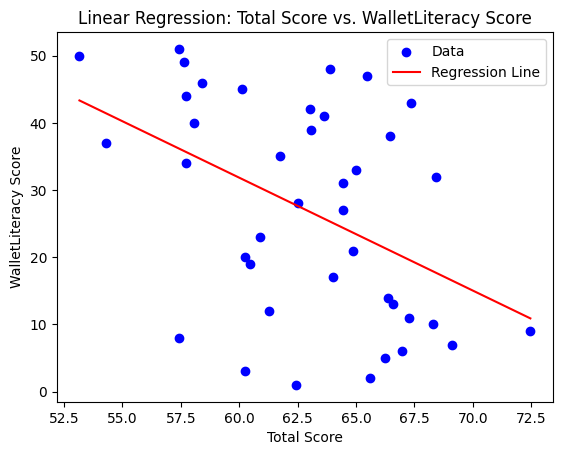

Regression for Total Score vs. Financial Planning & HabitsRank:
R-squared: 0.34608407846513545



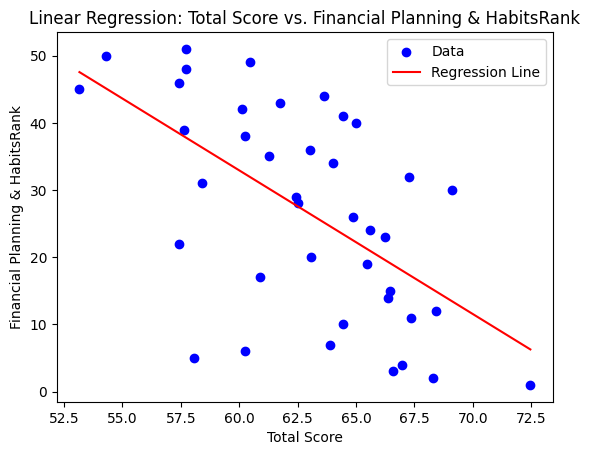

Regression for WalletLiteracy Score vs. Financial Knowledge & Education Rank:
R-squared: 0.04532664645104667



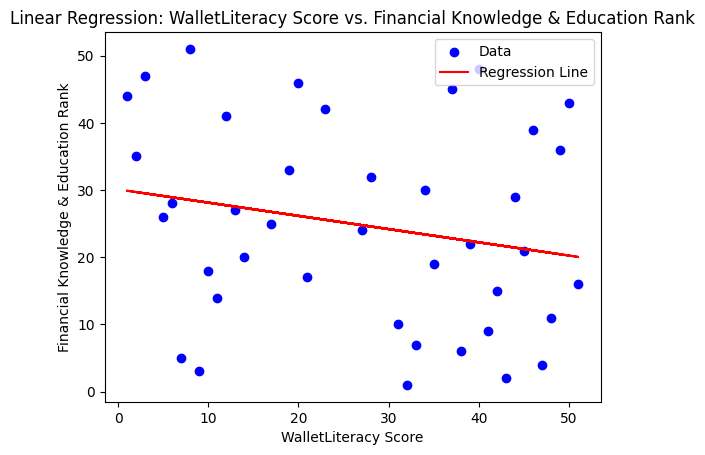

In [46]:
pairs = [
    ("Total Score", "WalletLiteracy Score"),
    ("Total Score", "Financial Planning & HabitsRank"),
    ("WalletLiteracy Score", "Financial Knowledge & Education Rank"),  # Added third pair
]

# Perform regression for each pair and plot results
for pair in pairs:
    # Extract data for the current pair, dropping rows with any missing values
    data = merged_data[[pair[0], pair[1]]].dropna()
    x = data[pair[0]].values.reshape(-1, 1)  # Independent variable
    y = data[pair[1]].values  # Dependent variable

    # Linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Make predictions
    y_pred = model.predict(x)

    # Evaluate the model (e.g., using R-squared)
    r2 = r2_score(y, y_pred)
    print(f"Regression for {pair[0]} vs. {pair[1]}:")
    print(f"R-squared: {r2}\n")

    # Visualize the results
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, y_pred, color='red', label='Regression Line')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f'Linear Regression: {pair[0]} vs. {pair[1]}')
    plt.legend()
    plt.show()